In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
df_DisponibiliteAlimentaire_2017 = pd.read_csv('DAN-P9-data/DisponibiliteAlimentaire_2017.csv')

In [347]:
df_DisponibiliteAlimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [348]:
# getting the list of unique values
li = list(df_DisponibiliteAlimentaire_2017.Zone.value_counts())
  
# print the unique value counts
print("No.of.unique values :",
      len(li))

a= df_DisponibiliteAlimentaire_2017['Zone'].unique()
a.sort()

No.of.unique values : 174


In [349]:
df_DisponibiliteAlimentaire_2017_volaille = df_DisponibiliteAlimentaire_2017.loc[df_DisponibiliteAlimentaire_2017['Produit']=='Viande de Volailles',['Code zone','Zone','Élément','Valeur']]


In [350]:
df_DisponibiliteAlimentaire_2017_volailleCopy= df_DisponibiliteAlimentaire_2017_volaille.copy()

In [351]:
df_pivot = df_DisponibiliteAlimentaire_2017_volailleCopy.pivot_table(index=['Code zone','Zone'],
                    columns=['Élément'], values='Valeur', aggfunc=np.sum).reset_index()

In [352]:
df_pivot.head()

Élément,Code zone,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,1,Arménie,NaN,NaN,NaN,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,0.0,11.0,0.0,NaN,NaN,-2.0
1,2,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
2,3,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,4,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,7,Angola,0.0,NaN,NaN,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,2.0,42.0,0.0,NaN,2.0,0.0


In [353]:
df_pivot.drop(['Disponibilité alimentaire (Kcal/personne/jour)','Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure','Nourriture','Production','Pertes','Résidus','Semences','Traitement','Variation de stock','Exportations - Quantité'], axis=1, inplace= True)


In [354]:
df_pivot.head()

Élément,Code zone,Zone,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité
0,1,Arménie,5.44,35.0
1,2,Afghanistan,0.54,29.0
2,3,Albanie,6.26,38.0
3,4,Algérie,1.97,2.0
4,7,Angola,3.60,277.0


In [355]:
df_population = pd.read_csv('DAN-P9-data/Population_2000_2018.csv')

In [356]:
df_population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [357]:
df_population = df_population.loc[df_population['Code année'] == 2017]

In [358]:
df_population.drop(['Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole','Note'],axis=1,inplace=True)

In [359]:
df_population.head()

,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [360]:
linked_File= pd.merge(df_pivot,df_population, on='Zone',how='left')
linked_File

,Code zone,Zone,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Valeur
0,1,Arménie,5.44,35.0,2944.791
1,2,Afghanistan,0.54,29.0,36296.113
2,3,Albanie,6.26,38.0,2884.169
3,4,Algérie,1.97,2.0,41389.189
4,7,Angola,3.60,277.0,29816.766
...,...,...,...,...,...
167,255,Belgique,4.57,338.0,11419.748
168,256,Luxembourg,7.19,11.0,591.910
169,272,Serbie,3.50,12.0,8829.628
170,273,Monténégro,5.79,8.0,627.563


In [361]:
df_pib = pd.read_csv('DAN-P9-data/FAOSTAT_data_7-12-2022.csv')
df_pib.head()

,Code Domaine,Domaine,Code zone,Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole,Note
0,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2000,2000,I$,NaN,X,Sources internationales s?res,NaN
1,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2001,2001,I$,NaN,X,Sources internationales s?res,NaN
2,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2002,2002,I$,NaN,X,Sources internationales s?res,NaN
3,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2003,2003,I$,NaN,X,Sources internationales s?res,NaN
4,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2004,2004,I$,NaN,X,Sources internationales s?res,NaN


In [362]:
df_pibHabitant = df_pib.loc[df_pib['Code ann?e'] == 2017]

In [363]:
df_pibHabitant

,Code Domaine,Domaine,Code zone,Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole,Note
17,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Sources internationales s?res,NaN
39,FS,Donn?es de la s?curit? alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.3,X,Sources internationales s?res,NaN
61,FS,Donn?es de la s?curit? alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Sources internationales s?res,NaN
83,FS,Donn?es de la s?curit? alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11737.4,X,Sources internationales s?res,NaN
105,FS,Donn?es de la s?curit? alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,53071.5,X,Sources internationales s?res,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,FS,Donn?es de la s?curit? alimentaire,5815,Pays ? faible revenu et ? d?ficit vivrier,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,5001.3,X,Sources internationales s?res,NaN
5429,FS,Donn?es de la s?curit? alimentaire,5858,Pays ? faible revenu,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,1898.3,X,Sources internationales s?res,NaN
5451,FS,Donn?es de la s?curit? alimentaire,5859,Pays ? revenu moyen,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,6894.9,X,Sources internationales s?res,NaN
5473,FS,Donn?es de la s?curit? alimentaire,9010,High-income economies,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,48861.5,X,Sources internationales s?res,NaN


In [364]:
df_pibHabitant.drop(['Code Domaine','Domaine','Code ?l?ment','?l?ment','Code Produit','Produit','Code ann?e','Ann?e','Unit?','Symbole','Description du Symbole','Note'],axis=1,inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [365]:
df_pibHabitant.head()

,Code zone,Zone,Valeur
17,2,Afghanistan,2058.4
39,202,Afrique du Sud,13860.3
61,3,Albanie,12771.0
83,4,Algérie,11737.4
105,79,Allemagne,53071.5


In [366]:
df_pibHabitant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 17 to 5495
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  250 non-null    int64  
 1   Zone       250 non-null    object 
 2   Valeur     233 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.8+ KB


In [367]:
df_pibHabitant[df_pibHabitant['Valeur'].isna()]

,Code zone,Zone,Valeur
127,6,Andorre,NaN
897,41,"Chine, continentale",NaN
919,214,"Chine, Taiwan Province de",NaN
1095,49,Cuba,NaN
1271,178,érythrée,NaN
1623,85,Groenland,NaN
1821,47,îles Cook,NaN
2877,160,Niou?,NaN
2921,153,Nouvelle-Calédonie\t,NaN
3251,70,Polynésie française\t,NaN


In [368]:
df_pibHabitant.rename(columns={"Valeur": "PIB"},inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [369]:
linked_final_file =pd.merge(linked_File,df_pibHabitant, on='Code zone',how='left')

In [370]:
linked_final_file[linked_final_file['PIB'].isnull()]

,Code zone,Zone_x,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Valeur,Zone_y,PIB
26,41,"Chine, continentale",3.96,452.0,1421021.791,"Chine, continentale",NaN
30,49,Cuba,7.12,312.0,11339.254,Cuba,NaN
45,70,Polynésie française,16.20,15.0,276.102,Polynésie française\t,NaN
80,116,République populaire démocratique de Corée,0.49,0.0,25429.825,R?publique populaire d?mocratique de Cor?e,NaN
106,153,Nouvelle-Calédonie,14.05,9.0,277.150,Nouvelle-Calédonie\t,NaN
145,214,"Chine, Taiwan Province de",11.01,161.0,23674.546,"Chine, Taiwan Province de",NaN
161,236,Venezuela (République bolivarienne du),7.23,25.0,29402.484,Venezuela (R?publique bolivarienne du),NaN
165,249,Yémen,3.04,78.0,27834.819,Y?men,NaN


In [371]:
# linked_final_file.drop(['Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production'],axis=1,inplace=True)

linked_final_file.rename(columns={"Valeur": "Population"},inplace=True)


In [372]:
TauxCPopulation = pd.read_csv('DAN-P9-data/Croissance annuelle en devise locale.csv')
TauxCPopulation.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6155,Croissance annuelle en devise locale,22008,Produit Intérieur Brut,1971,1971,%,4.701413,Fc,Donnée calculée,NaN
1,MK,Indicateurs macro,2,Afghanistan,6155,Croissance annuelle en devise locale,22008,Produit Intérieur Brut,1972,1972,%,-9.098297,Fc,Donnée calculée,NaN
2,MK,Indicateurs macro,2,Afghanistan,6155,Croissance annuelle en devise locale,22008,Produit Intérieur Brut,1973,1973,%,3.326422,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,2,Afghanistan,6155,Croissance annuelle en devise locale,22008,Produit Intérieur Brut,1974,1974,%,21.084722,Fc,Donnée calculée,NaN
4,MK,Indicateurs macro,2,Afghanistan,6155,Croissance annuelle en devise locale,22008,Produit Intérieur Brut,1975,1975,%,12.514942,Fc,Donnée calculée,NaN


In [373]:
TauxCPopulation = TauxCPopulation.loc[TauxCPopulation['Année']==2017,['Code zone','Zone','Valeur','Année']]


In [374]:
TauxCPopulation.head(20)

,Code zone,Zone,Valeur,Année
46,2,Afghanistan,5.114284,2017
96,2,Afghanistan,12.860168,2017
146,2,Afghanistan,7.890693,2017
196,2,Afghanistan,-9.800657,2017
246,2,Afghanistan,5.446732,2017
296,202,Afrique du Sud,6.756459,2017
346,202,Afrique du Sud,3.150441,2017
396,202,Afrique du Sud,13.340705,2017
446,202,Afrique du Sud,6.624789,2017
474,202,Afrique du Sud,6.624789,2017


In [375]:
 TauxCPopulation= TauxCPopulation.groupby('Code zone').mean().reset_index()

In [376]:
TauxCPopulation

,Code zone,Valeur,Année
0,1,23.039342,2017
1,2,4.302244,2017
2,3,4.614920,2017
3,4,5.244265,2017
4,6,3.791168,2017
...,...,...,...
205,276,36.095312,2017
206,277,171.616076,2017
207,279,-0.558268,2017
208,280,-1.030730,2017


In [377]:
data =pd.merge(linked_final_file,TauxCPopulation, on='Code zone',how='left')

In [378]:
data.rename(columns={"Valeur": "Taux-Croissance-Population"},inplace=True)

In [379]:
data

,Code zone,Zone_x,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,Zone_y,PIB,Taux-Croissance-Population,Année
0,1,Arménie,5.44,35.0,2944.791,Arménie,12115.1,23.039342,2017.0
1,2,Afghanistan,0.54,29.0,36296.113,Afghanistan,2058.4,4.302244,2017.0
2,3,Albanie,6.26,38.0,2884.169,Albanie,12771.0,4.614920,2017.0
3,4,Algérie,1.97,2.0,41389.189,Algérie,11737.4,5.244265,2017.0
4,7,Angola,3.60,277.0,29816.766,Angola,7310.9,19.246101,2017.0
...,...,...,...,...,...,...,...,...,...
167,255,Belgique,4.57,338.0,11419.748,Belgique,50442.3,5.671993,2017.0
168,256,Luxembourg,7.19,11.0,591.910,Luxembourg,114986.0,3.425398,2017.0
169,272,Serbie,3.50,12.0,8829.628,Serbie,16611.0,1.789254,2017.0
170,273,Monténégro,5.79,8.0,627.563,Monténégro,19682.3,11.584489,2017.0


In [380]:
TauxCPIB = pd.read_csv('DAN-P9-data/FAOSTAT_data_7-18-2022.csv')

In [381]:
TauxCPIB = TauxCPIB.loc[TauxCPIB['Année'] == 2017,['Code zone','Valeur']]

In [382]:
TauxCPIB.rename(columns={"Valeur": "Taux_CPib"},inplace=True)

In [383]:
TauxCPIB

,Code zone,Taux_CPib
47,2,13.507422
98,2,26.420199
149,2,3.530422
200,202,18.764543
251,202,2.361236
...,...,...
39187,5817,14.909805
39238,5817,12.880385
39262,5817,3.649817
39312,5817,98.283605


In [384]:
 TauxCPIB= TauxCPIB.groupby('Code zone').mean().reset_index()

In [385]:
TauxCPIB

,Code zone,Taux_CPib
0,1,12.536812
1,2,14.486014
2,3,12.690203
3,4,18.952196
4,6,7.659786
...,...,...
240,5801,29.502347
241,5802,27.280138
242,5803,22.532591
243,5815,29.134199


In [386]:
df = data.copy()

In [387]:
df =pd.merge(df,TauxCPIB, on='Code zone',how='left')
df

,Code zone,Zone_x,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,Zone_y,PIB,Taux-Croissance-Population,Année,Taux_CPib
0,1,Arménie,5.44,35.0,2944.791,Arménie,12115.1,23.039342,2017.0,12.536812
1,2,Afghanistan,0.54,29.0,36296.113,Afghanistan,2058.4,4.302244,2017.0,14.486014
2,3,Albanie,6.26,38.0,2884.169,Albanie,12771.0,4.614920,2017.0,12.690203
3,4,Algérie,1.97,2.0,41389.189,Algérie,11737.4,5.244265,2017.0,18.952196
4,7,Angola,3.60,277.0,29816.766,Angola,7310.9,19.246101,2017.0,13.323765
...,...,...,...,...,...,...,...,...,...,...
167,255,Belgique,4.57,338.0,11419.748,Belgique,50442.3,5.671993,2017.0,12.125676
168,256,Luxembourg,7.19,11.0,591.910,Luxembourg,114986.0,3.425398,2017.0,7.441916
169,272,Serbie,3.50,12.0,8829.628,Serbie,16611.0,1.789254,2017.0,10.631044
170,273,Monténégro,5.79,8.0,627.563,Monténégro,19682.3,11.584489,2017.0,9.762212


In [388]:
PoliticalStability = pd.read_csv('DAN-P9-data/PoliticalStability.csv')
RegionCountry = pd.read_csv('DAN-P9-data/RegionCountry.csv')


In [389]:
PoliticalStability.head()

,Code Domaine,Domaine,Code zone,Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole,Note
0,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Sources internationales s?res,NaN
1,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2001,2001,indice,NaN,X,Sources internationales s?res,NaN
2,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Sources internationales s?res,NaN
3,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Sources internationales s?res,NaN
4,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2004,2004,indice,-2.30,X,Sources internationales s?res,NaN


In [390]:
PoliticalStability =PoliticalStability.loc[PoliticalStability['Ann?e']==2017,['Code zone','Valeur']]


In [391]:
PoliticalStability.head()

,Code zone,Valeur
17,2,-2.80
39,202,-0.28
61,3,0.38
83,4,-0.92
105,79,0.59


In [392]:
PoliticalStability.rename(columns={"Valeur": "Political_Stability"},inplace=True)

In [393]:
df =pd.merge(df,PoliticalStability, on='Code zone',how='left')

In [394]:
df.drop(['Année','Zone_y'],axis=1,inplace=True)

In [395]:
df.rename(columns={"Zone_x": "Pays"},inplace=True)

In [396]:
df.fillna(0,inplace=True)

In [397]:
df.drop(['Code zone'],axis=1,inplace=True)

In [398]:
region = pd.read_excel('DAN-P9-data/region.xlsx')  

In [399]:
region.head()

,Pays,Region
0,Afghanistan,Asie
1,Afrique du Sud,Afrique
2,Åland (les Îles),Europe
3,Albanie,Europe
4,Algérie,Afrique


In [411]:
file = df.copy()

In [412]:
file =pd.merge(df,region, on='Pays',how='left')

In [413]:
file

,Pays,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,PIB,Taux-Croissance-Population,Taux_CPib,Political_Stability,Region
0,Arménie,5.44,35.0,2944.791,12115.1,23.039342,12.536812,-0.62,NaN
1,Afghanistan,0.54,29.0,36296.113,2058.4,4.302244,14.486014,-2.80,NaN
2,Albanie,6.26,38.0,2884.169,12771.0,4.614920,12.690203,0.38,NaN
3,Algérie,1.97,2.0,41389.189,11737.4,5.244265,18.952196,-0.92,NaN
4,Angola,3.60,277.0,29816.766,7310.9,19.246101,13.323765,-0.38,NaN
...,...,...,...,...,...,...,...,...,...
167,Belgique,4.57,338.0,11419.748,50442.3,5.671993,12.125676,0.43,NaN
168,Luxembourg,7.19,11.0,591.910,114986.0,3.425398,7.441916,1.33,NaN
169,Serbie,3.50,12.0,8829.628,16611.0,1.789254,10.631044,0.09,NaN
170,Monténégro,5.79,8.0,627.563,19682.3,11.584489,9.762212,-0.06,NaN


In [333]:
df.to_csv('data.csv')

In [207]:
df.columns
#specify the 12 metrics column names to be modelled
to_model_columns=df.columns[2:8]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df[to_model_columns])
pred = clf.predict(dat[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    151
-1     21
Name: anomaly, dtype: int64


In [ ]:
faire attention car les PIb(etc...) peuvent etre differents mais cela ne veut pas dire que ce sont les outliers

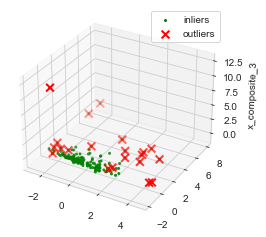

In [208]:
# Normalisez et adaptez les métriques à une PCA pour réduire le nombre de dimensions, 
# puis tracez-les en 3D en mettant en évidence les anomalies.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [505]:
X_train_cleaned = dat[np.where(dat.anomaly == 1, True, False)]

In [214]:
df.head()

,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,PIB,Taux-Croissance-Population,Taux_CPib,Political_Stability,anomaly
Zone,,,,,,,,
Afghanistan,0.54,29.0,36296.113,2058.4,4.302244,14.486014,-2.80,-1
Afrique du Sud,14.11,514.0,57009.756,13860.3,7.088572,8.950286,-0.28,1
Albanie,6.26,38.0,2884.169,12771.0,4.614920,12.690203,0.38,1
Algérie,1.97,2.0,41389.189,11737.4,5.244265,18.952196,0.00,1
Allemagne,7.96,842.0,82658.409,53071.5,10.985214,13.932926,0.59,-1


In [ ]:
df.loc[df['Zone'] == 'Armenie']

In [209]:
df.set_index('Zone', inplace=True)
val = df.values
val.shape

(172, 8)

In [210]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(val)
X_scaled = std_scale.transform(val)
# Clustering hiérarchique
Z = linkage(X_scaled, method='ward',metric='euclidean')

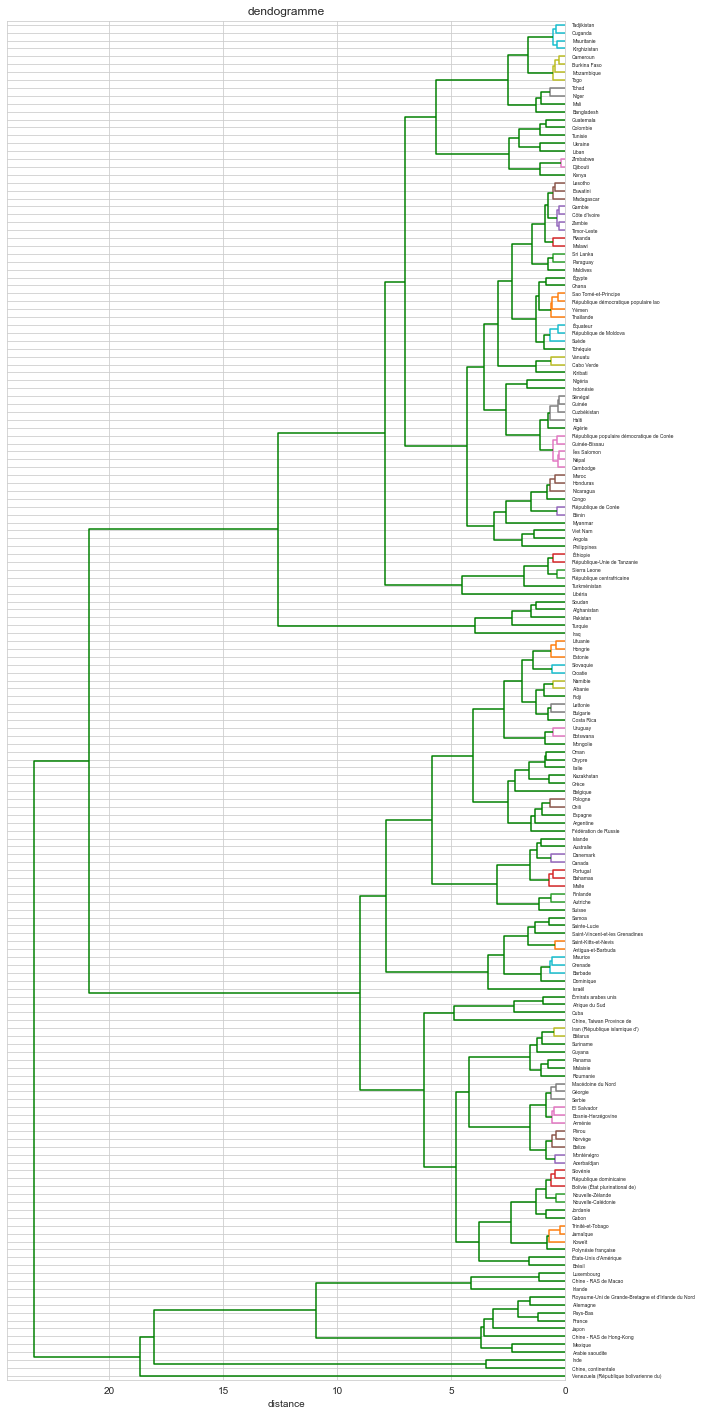

In [211]:
fig = plt.figure(figsize=(10,25))
sns.set_style("whitegrid")
plt.title('dendogramme')
plt.xlabel('distance')
dendrogram(Z,labels = dat.index,above_threshold_color="green", color_threshold=.7,orientation = "left")
plt.show()

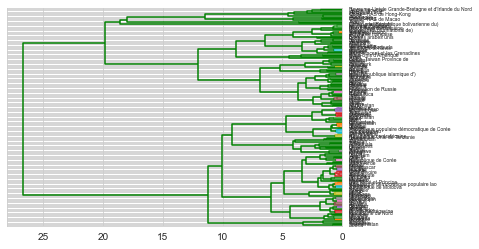

In [98]:
dendrogram(Z,p=40,labels = dat.index,above_threshold_color="green", color_threshold=.7,orientation = "left")
plt.show()

In [85]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({ "cluster": clusters, "title": dat.index})
print(courses.pivot_table(index=dat.index, columns="cluster", aggfunc=len, fill_value=0))

                      title                                 
cluster                  1  2  3  4  5  6  7  8  9  10 11 12
Zone                                                        
Afghanistan               0  0  1  0  0  0  0  0  0  0  0  0
Afrique du Sud            0  0  0  0  0  0  0  0  0  0  1  0
Albanie                   0  0  0  0  1  0  0  0  0  0  0  0
Algérie                   0  0  0  1  0  0  0  0  0  0  0  0
Allemagne                 0  0  0  0  0  0  0  0  0  0  1  0
...                     ... .. .. .. .. .. .. .. .. .. .. ..
Émirats arabes unis       0  0  0  0  0  0  0  1  0  0  0  0
Équateur                  0  1  0  0  0  0  0  0  0  0  0  0
États-Unis d'Amérique     0  0  0  0  0  0  1  0  0  0  0  0
Éthiopie                  1  0  0  0  0  0  0  0  0  0  0  0
Îles Salomon              0  0  0  1  0  0  0  0  0  0  0  0

[172 rows x 12 columns]


In [61]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(dat)
ward

AgglomerativeClustering(compute_full_tree=True)

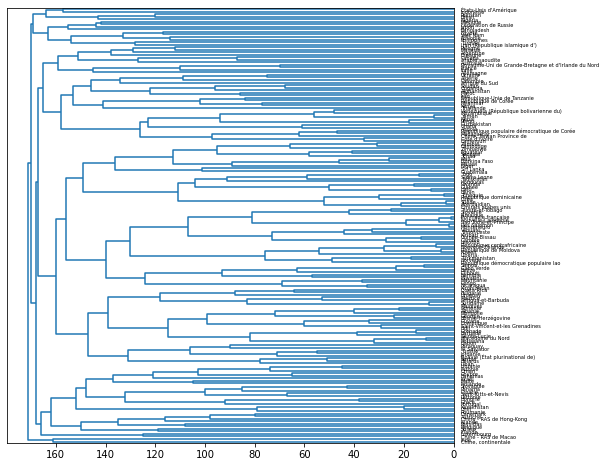

In [63]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # le dernier coefficient devrait contenir le nombre de feuilles dépendant de ce noeud
    # et non le dernier indice
    # de même, le niveau (3ème colonne) ne devrait pas être le nombre de noeud
    # mais la distance de Ward

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=list(dat.index),
               show_leaf_counts=True, ax=ax, orientation="left")

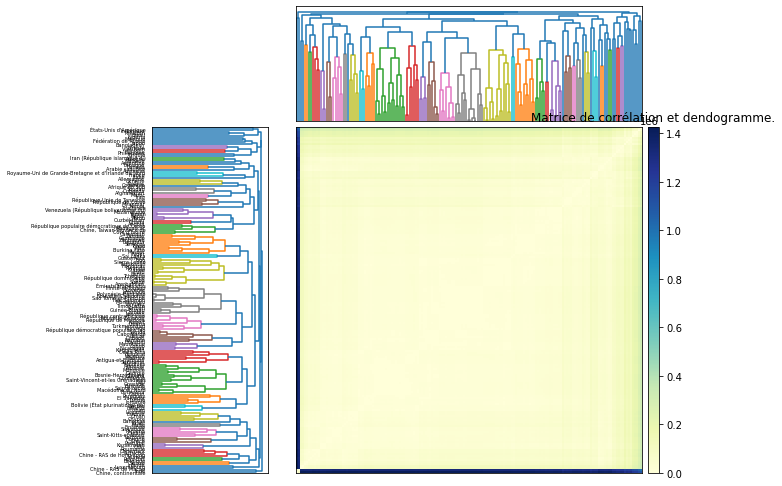

In [64]:
from scipy.spatial.distance import pdist, squareform

data_dist = pdist(dat)

fig = plt.figure(figsize=(8,8))

# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(dendro, orientation='right',labels=list(dat.index))
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(dendro)
ax2.set_xticks([])
ax2.set_yticks([])

# Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']

D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.title("Matrice de corrélation et dendogramme.");

<ipython-input-88-50a55837c6cb>:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)


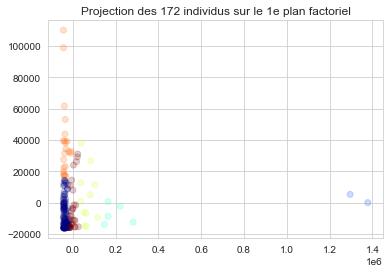

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 6

# import de l'échantillon
data = dat.copy()

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data)

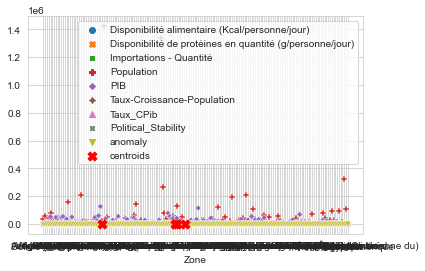

In [96]:
sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()